#### Decision Tree
A Decision tree is a tree-like structure that represents a set of decisions and their possible consequences. Each node in the tree represents a decision, and each branch represents an outcome of that decision. The leaves of the tree represent the final decisions or predictions.

Decision trees are created by recursively partitioning the data into smaller and smaller subsets. At each partition, the data is split based on a specific feature, and the split is made in a way that maximizes the information gain.

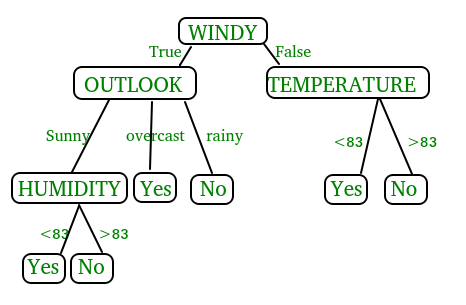

In the above figure, decision tree is a flowchart-like tree structure that is used to make decisions. It consists of Root Node(WINDY), Internal nodes(OUTLOOK, TEMPERATURE), which represent tests on attributes, and leaf nodes, which represent the final decisions. The branches of the tree represent the possible outcomes of the tests.

### Key Components of Decision Trees in Python
1.Root Node: The decision tree’s starting node, which stands for the complete dataset.

2.Branch Nodes: Internal nodes that represent decision points, where the data is split based on a specific attribute.

3.Leaf Nodes: Final categorization or prediction-representing terminal nodes.

4.Decision Rules: Rules that govern the splitting of data at each branch node.

5.Attribute Selection: The process of choosing the most informative attribute for each split.

6.Splitting Criteria: Metrics like information gain, entropy, or the Gini Index are used to calculate the optimal split.


In [10]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


In [2]:
# Function to import the dataset
def importdata():
    balance_data = pd.read_csv(
        'https://archive.ics.uci.edu/ml/machine-learning-' +
        'databases/balance-scale/balance-scale.data',
        sep=',', header=None)

    # Displaying dataset information
    print("Dataset Length: ", len(balance_data))
    print("Dataset Shape: ", balance_data.shape)
    print("Dataset: ", balance_data.head())
    
    return balance_data


In [3]:
# Function to split the dataset into features and target variables
def splitdataset(balance_data):

    # Separating the target variable
    X = balance_data.values[:, 1:5]
    Y = balance_data.values[:, 0]

    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=100)

    return X, Y, X_train, X_test, y_train, y_test


In [4]:
def train_using_gini(X_train, X_test, y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini


In [5]:
def train_using_entropy(X_train, X_test, y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy


In [6]:
# Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))


In [7]:
 from sklearn import tree
# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()


Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5


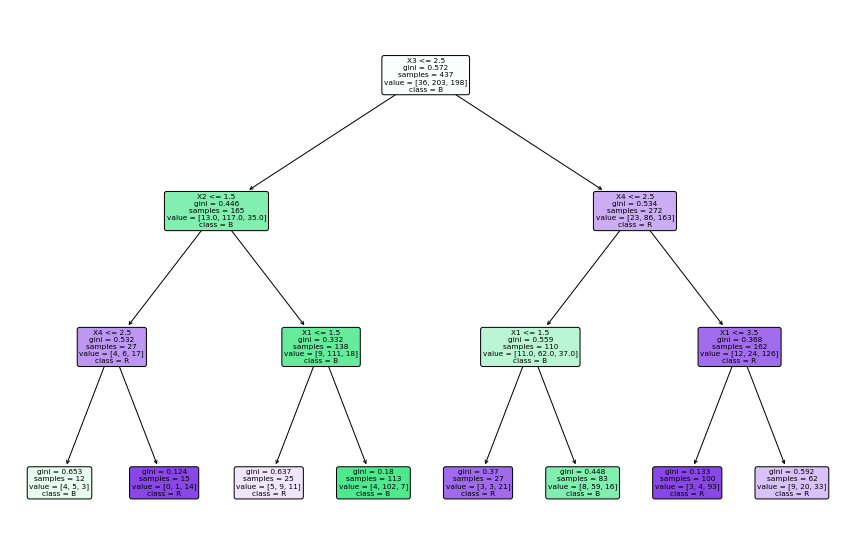

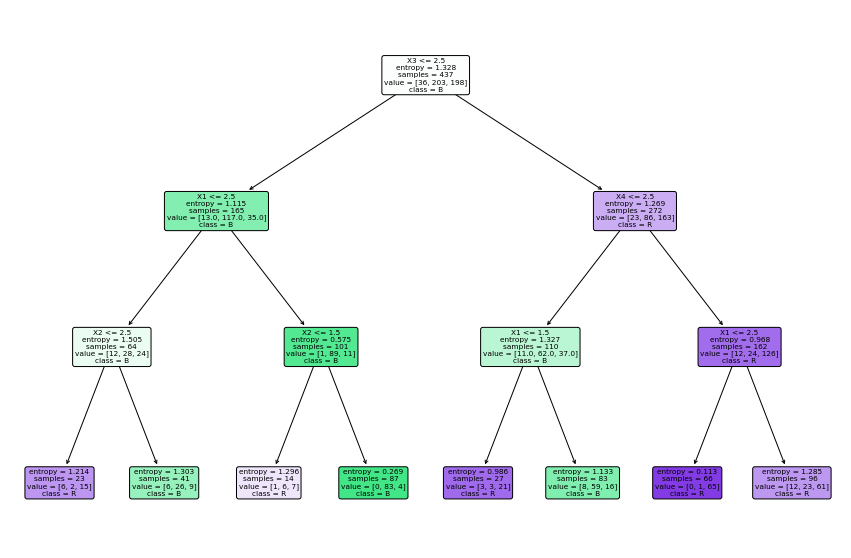

In [11]:
if __name__ == "__main__":
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)

    # Visualizing the Decision Trees
    plot_decision_tree(clf_gini, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])
    plot_decision_tree(clf_entropy, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])


In [12]:
# Operational Phase
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)


Results Using Gini Index:
Predicted values:
['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']
Confusion Matrix:  [[ 0  6  7]
 [ 0 67 18]
 [ 0 19 71]]
Accuracy :  73.40425531914893
Report :                precision    recall  f1-score   support

           B       0.00      0.00      0.

C:\Users\karma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)


Results Using Entropy:
Predicted values:
['R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L'
 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L'
 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'R'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'R']
Confusion Matrix:  [[ 0  6  7]
 [ 0 63 22]
 [ 0 20 70]]
Accuracy :  70.74468085106383
Report :                precision    recall  f1-score   support

           B       0.00      0.00      0.00 

C:\Users\karma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### Applications of Decision Trees
Python Decision trees are versatile tools with a wide range of applications in machine learning:

Classification: Making predictions about categorical results, like if an email is spam or not.
Regression: The estimation of continuous values; for example, feature-based home price prediction.
Feature Selection: Feature selection lowers dimensionality and boosts model performance by determining which features are most pertinent to a certain job.
Conclusion
Python decision trees provide a strong and comprehensible method for handling machine learning tasks. They are an invaluable tool for a variety of applications because of their ease of use, efficiency, and capacity to handle both numerical and categorical data. Decision trees are a useful tool for making precise forecasts and insightful analysis when used carefully.

1. What are decision trees?
Decision trees are a type of machine learning algorithm that can be used for both classification and regression tasks. They work by partitioning the data into smaller and smaller subsets based on certain criteria. The final decision is made by following the path through the tree that is most likely to lead to the correct outcome.

2. How do decision trees work?
Decision trees work by recursively partitioning the data into smaller subsets. At each partition, a decision is made based on a certain criterion, such as the value of a particular feature. The data is then partitioned again based on the value of a different feature, and so on. This process continues until the data is divided into a number of subsets that are each relatively homogeneous.

3. How do you implement a decision tree in Python?
There are several libraries available for implementing decision trees in Python. One popular library is scikit-learn. To implement a decision tree in scikit-learn, you can use the DecisionTreeClassifier class. This class has several parameters that you can set, such as the criterion for splitting the data and the maximum depth of the tree.

4. How do you evaluate the performance of a decision tree?
There are several metrics that you can use to evaluate the performance of a decision tree. One common metric is accuracy, which is the proportion of predictions that the tree makes correctly. Another common metric is precision, which is the proportion of positive predictions that are actually correct. And another common metric is recall, which is the proportion of actual positives that the tree correctly identifies as positive.

5. What are some of the challenges of using decision trees? 
Some of the challenges of using decision trees include:

Overfitting: Decision trees can be prone to overfitting, which means that they can learn the training data too well and not generalize well to new data.
Interpretability: Decision trees can be difficult to interpret when they are very deep or complex.
Feature selection: Decision trees can be sensitive to the choice of features.
Pruning: Decision trees can be difficult to prune, which means that it can be difficult to remove irrelevant branches from the tree.

In [14]:
# import numpy package for arrays and stuff 
import numpy as np 

# import matplotlib.pyplot for plotting our result 
import matplotlib.pyplot as plt 

# import pandas for importing csv files 
import pandas as pd 


In [15]:
# import dataset 
# dataset = pd.read_csv('Data.csv') 
# alternatively open up .csv file to read data 

dataset = np.array( 
[['Asset Flip', 100, 1000], 
['Text Based', 500, 3000], 
['Visual Novel', 1500, 5000], 
['2D Pixel Art', 3500, 8000], 
['2D Vector Art', 5000, 6500], 
['Strategy', 6000, 7000], 
['First Person Shooter', 8000, 15000], 
['Simulator', 9500, 20000], 
['Racing', 12000, 21000], 
['RPG', 14000, 25000], 
['Sandbox', 15500, 27000], 
['Open-World', 16500, 30000], 
['MMOFPS', 25000, 52000], 
['MMORPG', 30000, 80000] 
]) 

# print the dataset 
print(dataset) 


[['Asset Flip' '100' '1000']
 ['Text Based' '500' '3000']
 ['Visual Novel' '1500' '5000']
 ['2D Pixel Art' '3500' '8000']
 ['2D Vector Art' '5000' '6500']
 ['Strategy' '6000' '7000']
 ['First Person Shooter' '8000' '15000']
 ['Simulator' '9500' '20000']
 ['Racing' '12000' '21000']
 ['RPG' '14000' '25000']
 ['Sandbox' '15500' '27000']
 ['Open-World' '16500' '30000']
 ['MMOFPS' '25000' '52000']
 ['MMORPG' '30000' '80000']]


In [16]:
# select all rows by : and column 1 
# by 1:2 representing features 
X = dataset[:, 1:2].astype(int) 

# print X 
print(X) 


[[  100]
 [  500]
 [ 1500]
 [ 3500]
 [ 5000]
 [ 6000]
 [ 8000]
 [ 9500]
 [12000]
 [14000]
 [15500]
 [16500]
 [25000]
 [30000]]


In [17]:
# select all rows by : and column 2 
# by 2 to Y representing labels 
y = dataset[:, 2].astype(int) 

# print y 
print(y) 


[ 1000  3000  5000  8000  6500  7000 15000 20000 21000 25000 27000 30000
 52000 80000]


In [18]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor 

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0) 

# fit the regressor with X and Y data 
regressor.fit(X, y) 


DecisionTreeRegressor(random_state=0)

In [19]:
# predicting a new value 

# test the output by changing values, like 3750 
y_pred = regressor.predict([[3750]]) 

# print the predicted price 
print("Predicted price: % d\n"% y_pred) 


Predicted price:  8000



C:\Users\karma\AppData\Local\Temp\ipykernel_22456\1645866577.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted price: % d\n"% y_pred)


C:\Users\karma\AppData\Local\Temp\ipykernel_22456\1595135500.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


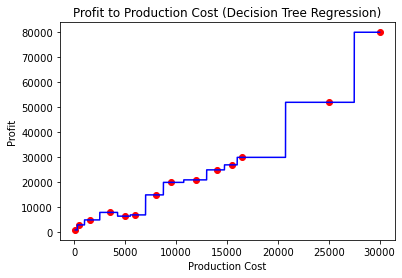

In [20]:
# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two 
# consecutive values 
X_grid = np.arange(min(X), max(X), 0.01) 

# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make 
# a column out of the X_grid values 
X_grid = X_grid.reshape((len(X_grid), 1)) 

# scatter plot for original data 
plt.scatter(X, y, color = 'red') 

# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 

# specify title 
plt.title('Profit to Production Cost (Decision Tree Regression)') 

# specify X axis label 
plt.xlabel('Production Cost') 

# specify Y axis label 
plt.ylabel('Profit') 

# show the plot 
plt.show() 


In [24]:
# import export_graphviz 
from sklearn.tree import export_graphviz 

# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(regressor, out_file ='tree.dot', 
			feature_names =['Production Cost']) 


In [26]:
import graphviz
# Convert the DOT file to a PNG file using Graphviz (requires Graphviz installed on your system)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render(filename='tree', format='png')

'tree.png'